In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
## Upload the dataframe into jupyter notebook
df = pd.read_csv('Loan prediction.csv')

In [4]:
## check how many rows and how many columns are there in the dataframe and count of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
## check the top 5 rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
## get the total number of null values in each of the column
df_null=df.isnull().sum()

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().sum()/len(df) * 100


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
## How many percentage of null values are there for each of the column
len(df)

614

In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: >

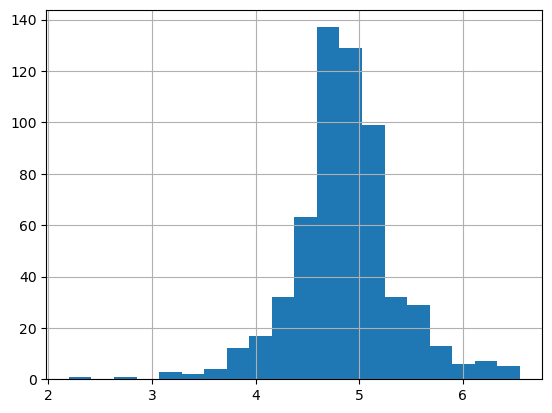

In [12]:

## checking the distribution of the each column
## Taking the decision based on the percentage of null values- which column should be kept and which one should be removed
##what are the columns will be replaced by mean/mode/median

df['LoanAmount_log']= np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [14]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [15]:
df['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

array([[<Axes: title={'center': 'LoanAmount'}>]], dtype=object)

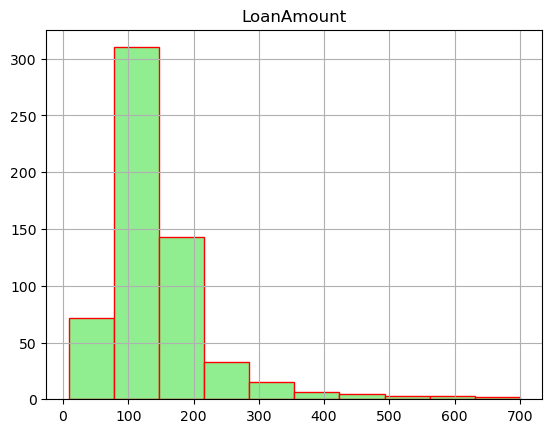

In [16]:
## checking the distribution of the each column
import matplotlib.pyplot as plt
import seaborn as sns
df.hist('LoanAmount',bins=10,color='lightgreen', edgecolor='red')
 

In [17]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [18]:
## creating a new column based on total income(applicantincome+coapplicantincome)
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0


<Axes: xlabel='TotalIncome', ylabel='Count'>

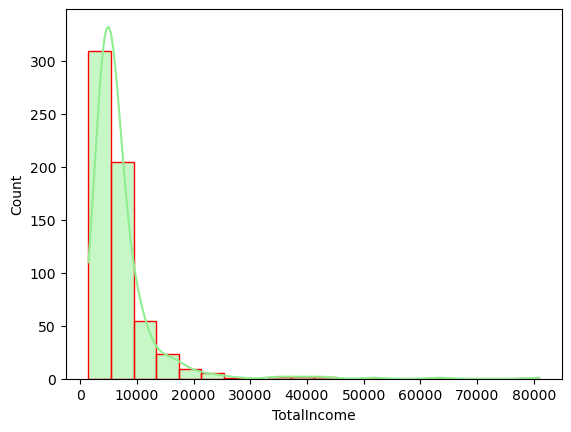

In [20]:
## checking the distribution of the new column 'TotalIncome'
sns.histplot(df,x='TotalIncome',kde=True,bins=20,color='lightgreen', edgecolor='red')

<Axes: >

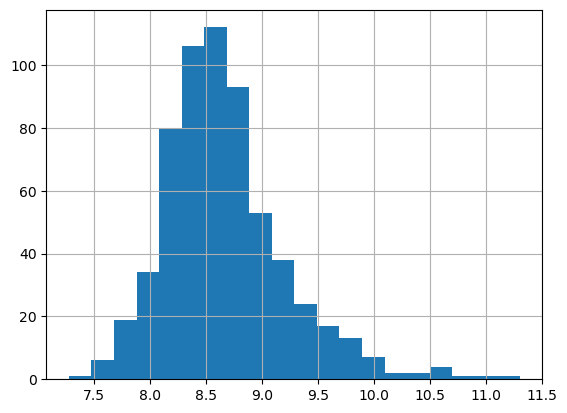

In [21]:
## checking the distribution with the help of log funcion
df['TotalIncome_log']= np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [23]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [ ]:
## How do I decide  which distribution plot gives me actual result for distribution---Log function or normal Distribution

In [24]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log
count,614.000000,614.000000,592.000000,600.00000,564.000000,592.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,4.857444,7024.705081,8.669414
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.505142,6458.663872,0.545102
min,150.000000,0.000000,9.000000,12.00000,0.000000,2.197225,1442.000000,7.273786
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4.605170,4166.000000,8.334712
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,4.852030,5416.500000,8.597205
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,5.123964,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,6.551080,81000.000000,11.302204


In [25]:
df.drop(['LoanAmount_log','TotalIncome_log'],axis=1,inplace=True)

In [26]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000


In [28]:
##Replacing the null values with the Mode value for each categorical column 
df['Gender'].fillna(df['Gender'].mode(0)[0],inplace=True)
df['Married'].fillna(df['Married'].mode(0)[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode(0)[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode(0)[0],inplace=True)



In [29]:
##Replacing the null values with the Mean value for each continious column 
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [30]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

number of people who took loan as group by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


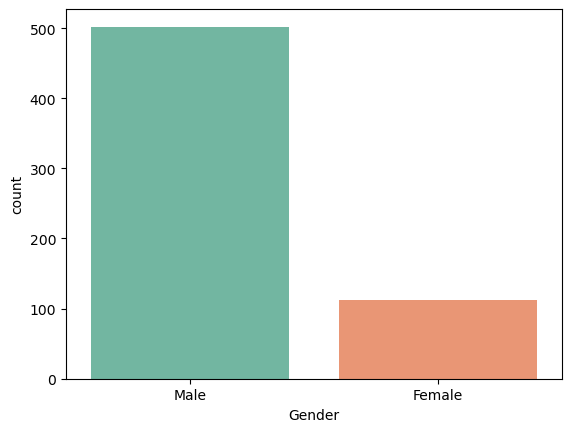

In [31]:
## Number of people who took loan based on the Gender(count vs Gender)
print("number of people who took loan as group by gender")
print(df['Gender'].value_counts())
import matplotlib.pyplot as plt
sns.countplot(x='Gender',data = df, palette = 'Set2')
plt.show()

number of people who took loan as group by gender
Married
Yes    401
No     213
Name: count, dtype: int64


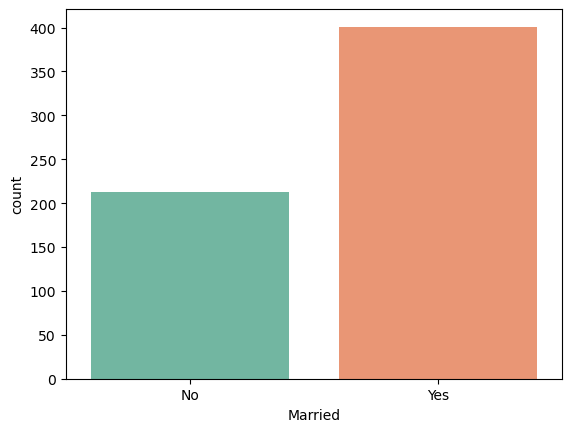

In [46]:
## Number of people who took loan based on the Gender(count vs Gender)
print("number of people who took loan as group by Marriage status")
print(df['Married'].value_counts())
import matplotlib.pyplot as plt
sns.countplot(x='Married',data = df, palette = 'Set2')
plt.show()

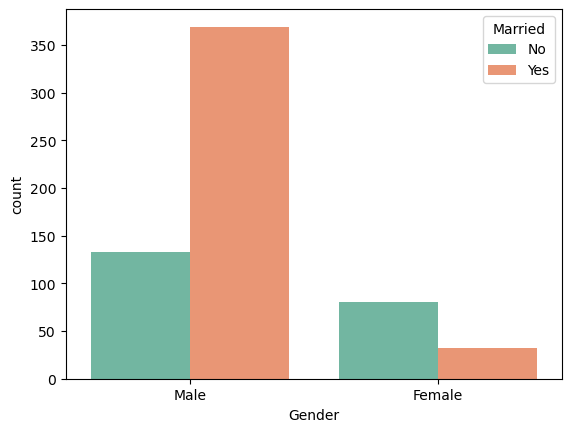

In [47]:

import matplotlib.pyplot as plt
sns.countplot(x='Gender',data = df, palette = 'Set2', hue='Married')
plt.show()

number of people who took loan as group by gender and maretial status
Gender
Male      502
Female    112
Name: count, dtype: int64


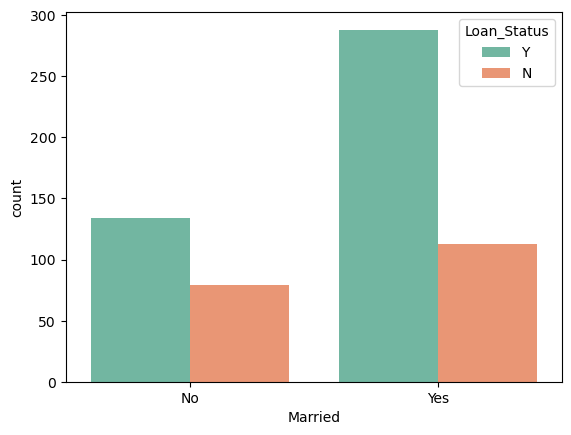

In [33]:
## Number of people who took loan based on their maretial status and (maretial status& Gender both)
print("number of people who took loan as group by gender and maretial status")
print(df['Gender'].value_counts())
import matplotlib.pyplot as plt
sns.countplot(x='Married',hue='Loan_Status',data = df, palette = 'Set2')
plt.show()


In [6]:
## Credit history distribution




In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  TotalIncome        614 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


Number of people who take loan as group by credit history
Credit_History
1.000000    475
0.000000     89
0.842199     50
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

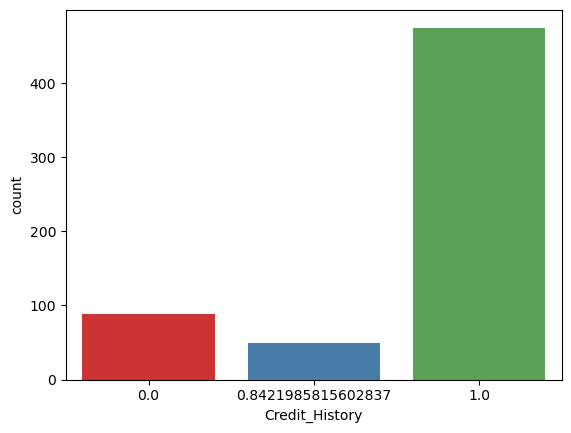

In [38]:
## Number of people who take loan as group by credit history
print('Number of people who take loan as group by credit history')
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette='Set1')

<Axes: xlabel='TotalIncome', ylabel='LoanAmount'>

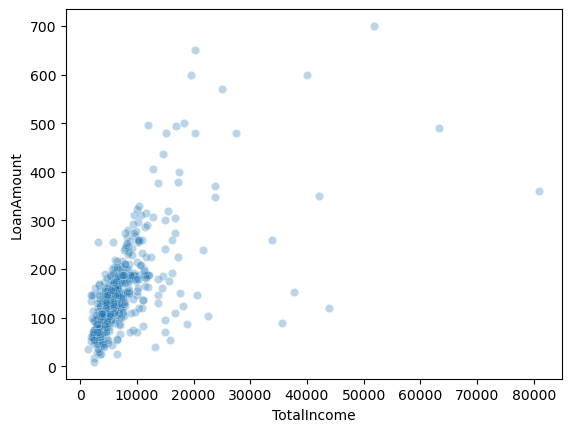

In [34]:
## Based on the TotalIncome of applicant, how much amount of loan, are they applying for? 

sns.scatterplot(x = 'TotalIncome',y = 'LoanAmount',data = df,alpha = 0.3)

In [37]:
sns.heatmap(df['TotalIncome','LoanAmount'].corr(numeric_only=True),annot=True)

KeyError: ('TotalIncome', 'LoanAmount')

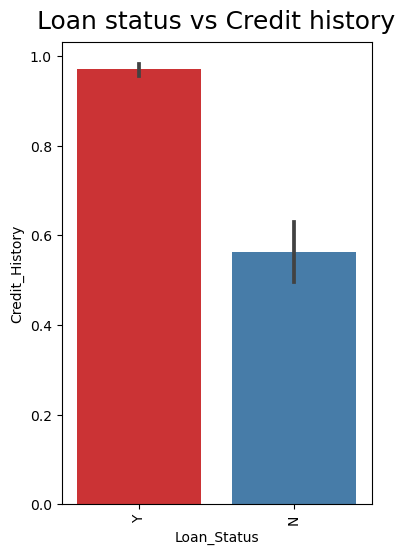

In [41]:
plt.figure(figsize=(4,6))
sns.barplot( x='Loan_Status', y='Credit_History', data=df, palette='Set1')
plt.xlabel('Loan_Status')
plt.ylabel('Credit_History')
plt.xticks(rotation = 90)
plt.title('Loan status vs Credit history', fontsize=18, pad=10)
plt.show()

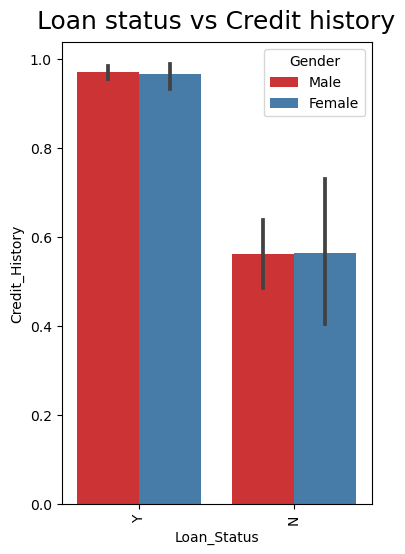

In [45]:
plt.figure(figsize=(4,6))
sns.barplot( x='Loan_Status', y='Credit_History', data=df, palette='Set1', hue='Gender')
plt.xlabel('Loan_Status')
plt.ylabel('Credit_History')
plt.xticks(rotation = 90)
plt.title('Loan status vs Credit history', fontsize=18, pad=10)
plt.show()

In [39]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  TotalIncome        614 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [41]:
df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447
TotalIncome,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000


<Axes: >

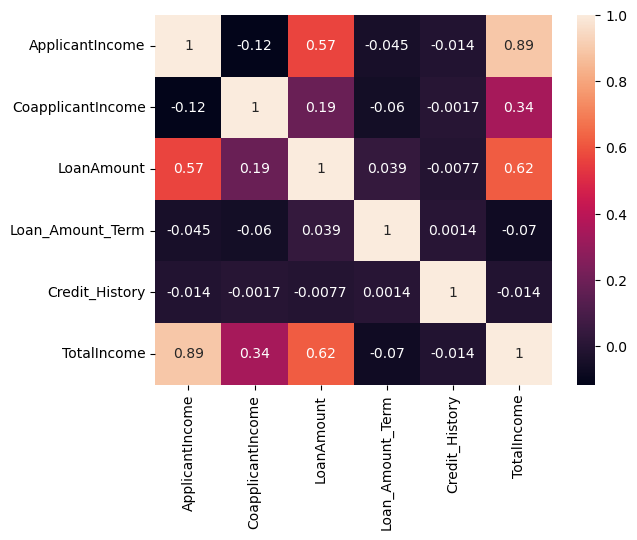

In [42]:
## Correlation 

sns.heatmap(df.corr(numeric_only=True), annot=True)

In [43]:
## label encoding
## treating categorical column first

print('ALL THE CATEGORICAL COLUMNS ARE')
df.columns[df.dtypes.isin([np.dtype('object')])]

ALL THE CATEGORICAL COLUMNS ARE


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [44]:
print(df['Dependents'].value_counts())

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


In [45]:
print(df['Education'].value_counts())

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender']= le.fit_transform(df['Gender'])
df['Married']= le.fit_transform(df['Married'])
df['Dependents']= le.fit_transform(df['Dependents']) 
df['Education']= le.fit_transform(df['Education']) 
df['Self_Employed']= le.fit_transform(df['Self_Employed']) 
df['Property_Area']= le.fit_transform(df['Property_Area']) 
df['Loan_Status']= le.fit_transform(df['Loan_Status']) 

In [47]:


pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


<Axes: >

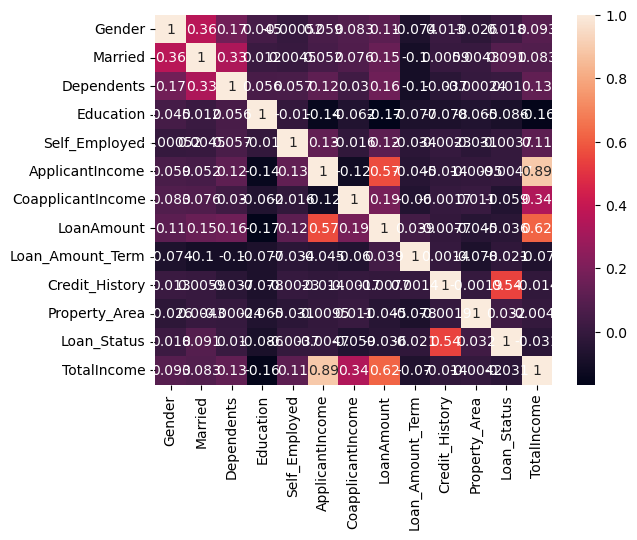

In [49]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [50]:
## LabelEncoder- for regression model change the categorical variable into different coding
##Regression Model

from sklearn.model_selection import train_test_split

X=df.iloc[:,0:11].values
y=df.iloc[:,11].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)






(491, 11)
(123, 11)


In [51]:
X_train
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [52]:
X_test
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [53]:
## Model
##Logistic regression
from scipy import stats
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Pritam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [175]:


LogisticRegression_Prediction=model.predict(X_test)
print('Logistic Regression accuracy=',metrics.accuracy_score(lr_prediction,y_test))

NameError: name 'lr_prediction' is not defined

In [55]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [56]:
from sklearn .ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [120]:
from  sklearn import metrics
y_pred=rf_clf.predict(X_test)

print('acc of random forest clf is', metrics.accuracy_score(y_pred,y_test))

y_pred

acc of random forest clf is 0.7560975609756098


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [181]:
from sklearn .ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
clf = GradientBoostingClassifier()
score = []
scores = cross_val_score(clf, X, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 77.85%
